In [1]:
import numpy as np
import pickle
import pyvista as pv

pv.start_xvfb()

from train import train
from defaults import *
from pprint import pprint

In [2]:
batch_size_train = 1
batch_size_test = 1
epochs = 1

In [3]:
config = {
  **TRAIN_CONFIG,
  "batch_size_train": batch_size_train,
  "batch_size_test": batch_size_test,
  "epochs": epochs,
}
pprint(config)

{'apply_transforms': True,
 'batch_size_test': 4,
 'batch_size_train': 4,
 'criterion': BCEWithLogitsLoss(),
 'device': 'cuda',
 'epochs': 10,
 'learning_rate': 1e-05,
 'optimizer': <class 'torch.optim.adam.Adam'>,
 'rotations': 4,
 'test_fraction': 0.25,
 'train_fraction': 0.75,
 'weight_decay': 0.0}


In [4]:
run_name = f"test_{epochs}_epochs"

train(run_name, config)

 70%|███████   | 7/10 [05:51<02:41, 53.94s/it]

In [ ]:
results_folder = f"./results/{run_name}"

with open(f"{results_folder}/predictions.p", "rb") as predictions_file:
    predictions = pickle.load(predictions_file)

with open(f"{results_folder}/predictions_raw.p", "rb") as predictions_raw_file:
    predictions_raw = pickle.load(predictions_raw_file)

with open(f"{results_folder}/actual_values.p", "rb") as actual_values_file:
    actual_values = pickle.load(actual_values_file)

(9, 410, 410)
(410, 410, 9)


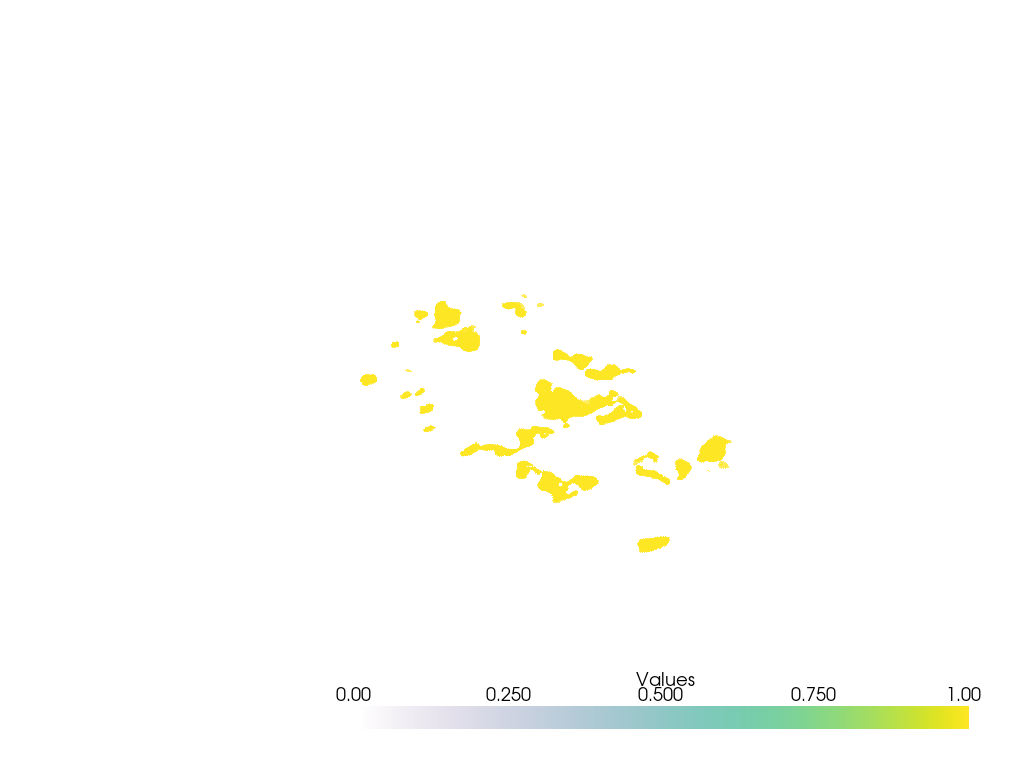

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [ ]:
# Actual

ITEM_INDEX = 18
actual_value = actual_values[ITEM_INDEX][0]
actual_value = actual_value.squeeze()
print(actual_value.shape)

actual_value = np.transpose(actual_value, (2, 1, 0))

print(actual_value.shape)

pl = pv.Plotter(notebook=True)
grid = pv.ImageData()
grid.dimensions = actual_value.shape

grid.point_data["Values"] = actual_value.flatten("F")
_ = pl.add_volume(grid, cmap="viridis")

pl.show(jupyter_backend="static")
pl.screenshot(f"{results_folder}/actual.png")

(410, 410, 9)


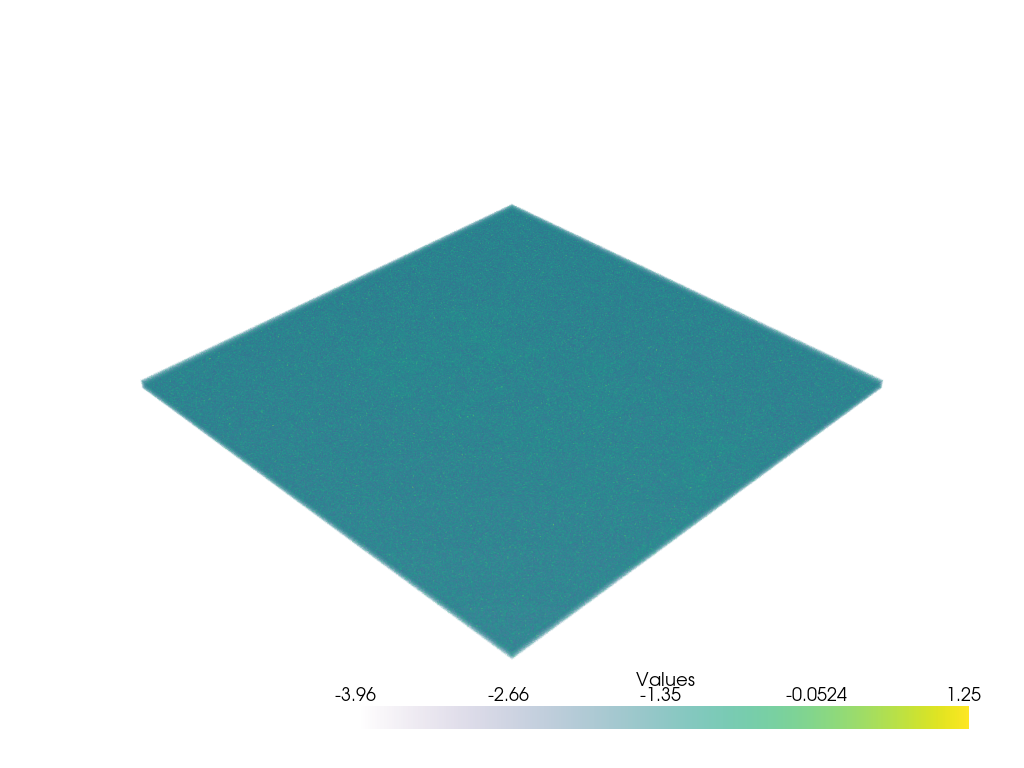

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [ ]:
# Prediction Raw

prediction_raw = predictions_raw[ITEM_INDEX][0]
prediction_raw = prediction_raw.squeeze()

prediction_raw = np.transpose(prediction_raw, (2, 1, 0))

print(prediction_raw.shape)

pl = pv.Plotter(notebook=True)
grid = pv.ImageData()
grid.dimensions = prediction_raw.shape

grid.point_data["Values"] = prediction_raw.flatten("F")
_ = pl.add_volume(grid, cmap="viridis")

pl.show(jupyter_backend="static")
pl.screenshot(f"{results_folder}/prediction_raw.png")

(410, 410, 9)


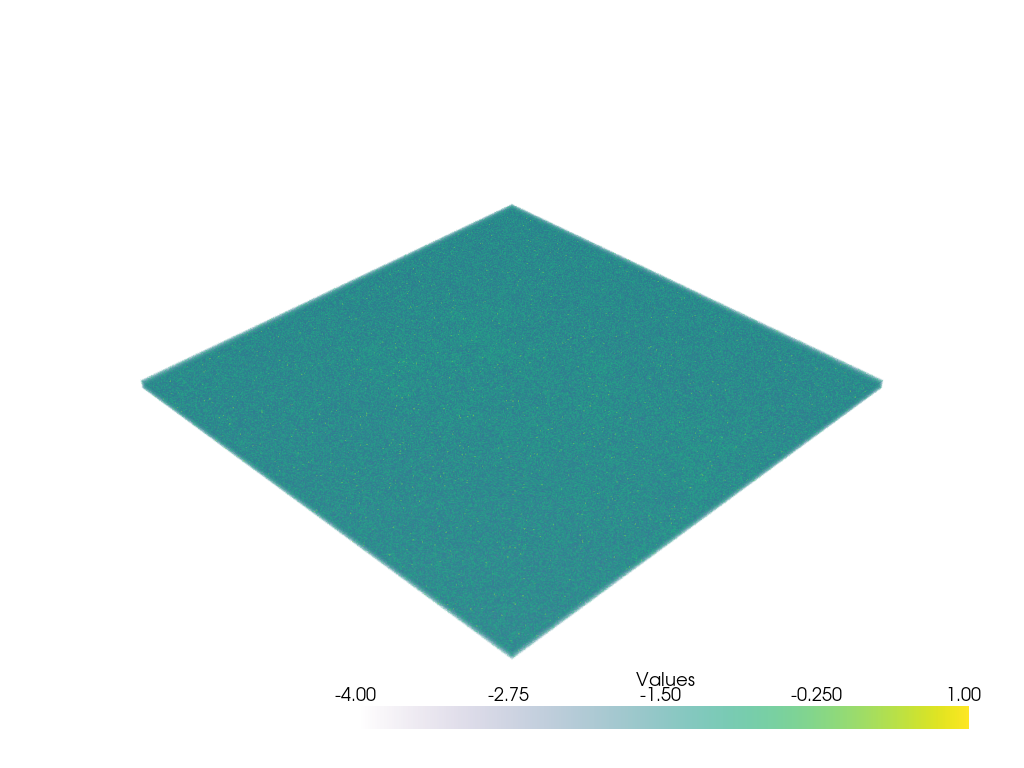

pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

In [ ]:
# Prediction

prediction = predictions[ITEM_INDEX][0]
prediction = prediction.squeeze()

prediction = np.transpose(prediction, (2, 1, 0))

print(prediction.shape)

pl = pv.Plotter(notebook=True)
grid = pv.ImageData()
grid.dimensions = prediction.shape

grid.point_data["Values"] = prediction.flatten("F")
_ = pl.add_volume(grid, cmap="viridis")

pl.show(jupyter_backend="static")
pl.screenshot(f"{results_folder}/prediction.png")